# Итоговая работа

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('c:\\temp\\HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###### 2.Рассчитать основные статистики для переменных

###### Медиана:

In [6]:
df.loc[:,('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',)].median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

###### Среднее:

In [7]:
df.loc[:,('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',)].mean()

satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
dtype: float64

###### Мода:

In [8]:
df.loc[:,('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',)].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [9]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


###### Min/Max:

In [10]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [11]:
df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

###### Стандартное отклонение:

In [12]:
np.std(df)

satisfaction_level        0.248622
last_evaluation           0.171163
number_project            1.232551
average_montly_hours     49.941434
time_spend_company        1.460088
Work_accident             0.351707
left                      0.425910
promotion_last_5years     0.144277
dtype: float64

###### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

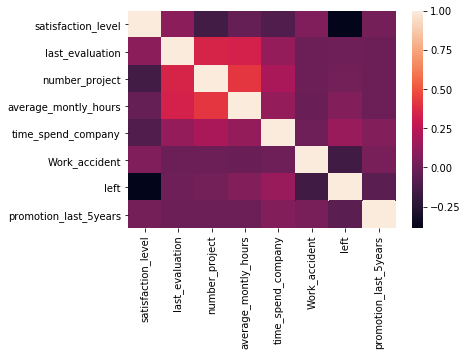

In [13]:
import seaborn as sns 
corr = df.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

###### 4.Визуализировать несколько взаимосвязей между переменными.

Text(0.5, 1.0, 'Зависимость уровня удовлетворенности работой от зарплаты')

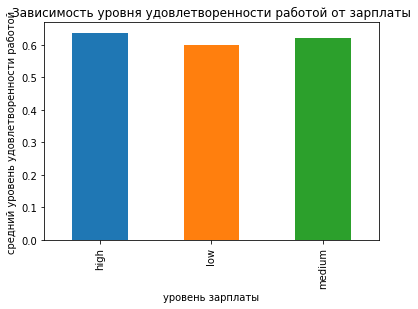

In [65]:
df1 = df.groupby(['salary']).mean()['satisfaction_level']
df1.plot(kind='bar')
plt.xlabel('уровень зарплаты')
plt.ylabel('средний уровень удовлетворенности работой')
plt.title('Зависимость уровня удовлетворенности работой от зарплаты')

In [66]:
df2 = df[['number_project', 'average_montly_hours']]

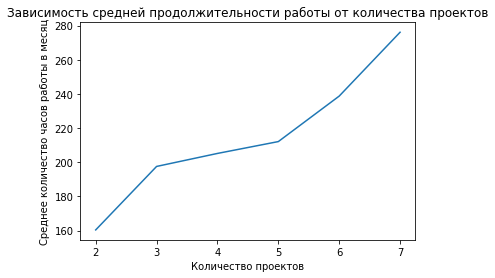

In [59]:
df2.plot()
plt.xlabel('Количество проектов')
plt.ylabel('Среднее количество часов работы в месяц')
plt.title('Зависимость средней продолжительности работы от количества проектов')
plt.show()

###### 6.Рассчитать сколько работников работает в каждом департаменте.

In [91]:
df3=df.groupby(['sales'])['satisfaction_level'].aggregate('count').sort_values(ascending=False)
df3

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: satisfaction_level, dtype: int64

###### 7.Показать распределение сотрудников по зарплатам.

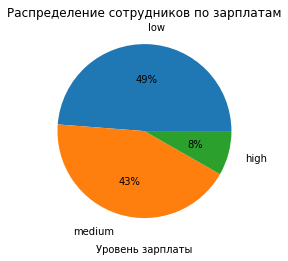

In [20]:
df4=df['salary'].value_counts()
df4.plot(kind='pie', autopct='%1.0f%%', subplots=True, labeldistance=1.2)
plt.xlabel('Уровень зарплаты')
plt.ylabel('')
plt.title('Распределение сотрудников по зарплатам')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)
plt.show()

###### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

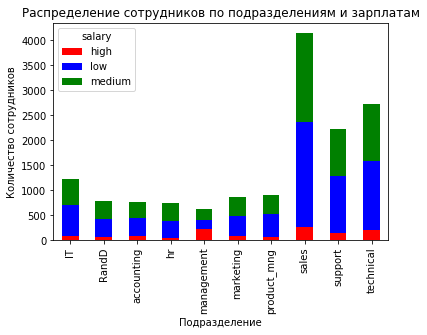

In [17]:
var = df.groupby(['sales', 'salary']).sales.count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue', 'green'], grid=False)
plt.xlabel('Подразделение')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по подразделениям и зарплатам')
plt.show()

###### 9.Сколько сотрудников покинули компанию.

In [110]:
print (len(df[df['left'] == 1]))

3571


###### 10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

Text(0, 0.5, 'Количество сотрудников')

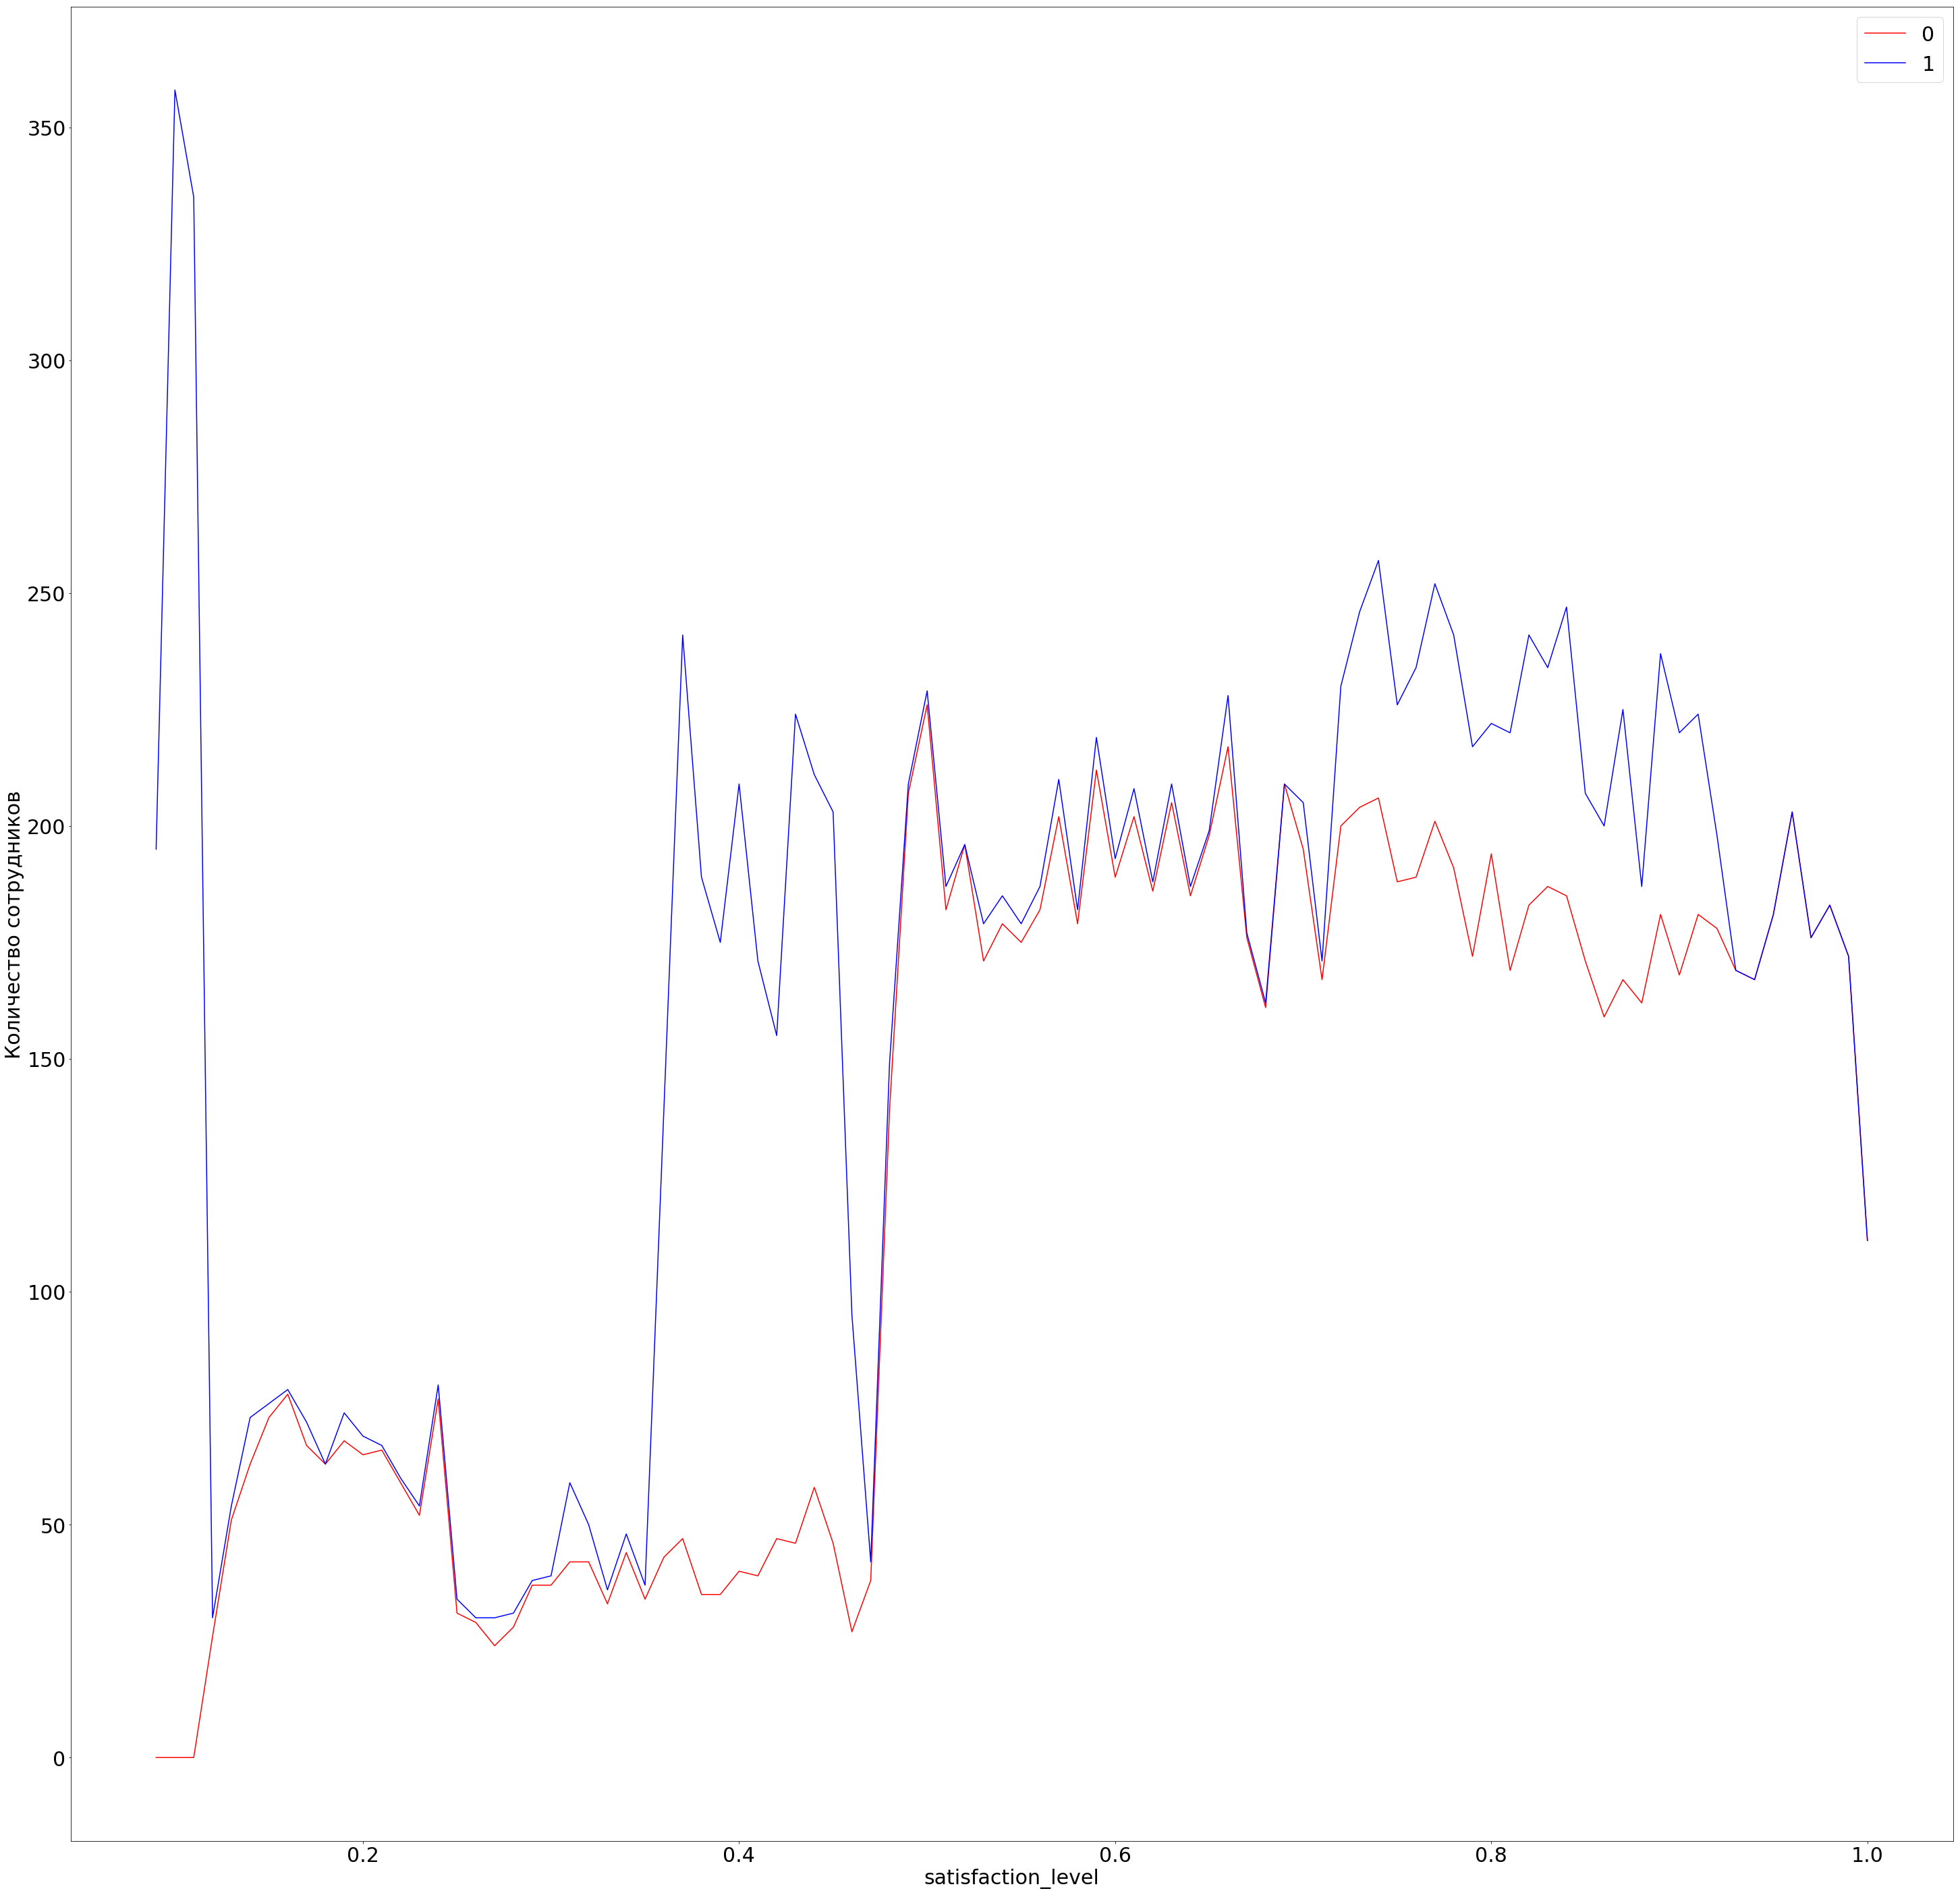

In [25]:
var = df.groupby(['satisfaction_level','left']).left.count()
var.head(300)
var.unstack().plot(kind='line',stacked=True,  color=['red','blue'], grid=False, figsize=(50, 50))
plt.legend(loc=1, fontsize = '30')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.rc('axes', labelsize=30)
plt.ylabel('Количество сотрудников')

Данная визуализация показывает зависимость факта ухода сотрудника из компаниии от уровня удовлетворенности работой. Исследуя графики, можно отметить, что наибольшая вероятность ухода наблюдается при уровне удовлетворенности 0,4 и 0,8. Возможно, что для этих сотрудников существует еще какой-то фактор, побуждающий их покинуть компанию 